# CCLE_expression - Initial Linear Regression


In [42]:
### Basic Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

### Statistics Libraries
import scipy.stats as stats

#Utils
import src
from src import utils
from src import fc_utils
from src import linear_model
from src import plot_utils



Cancer Cell Line Encyclopedia (CCLE) was accessed on 08 April 2024  from https://registry.opendata.aws/ccle.


Transcriptomics Data

In [43]:
CCLE_expression = pd.read_csv('Data/CCLE/CCLE_expression.csv', index_col='Unnamed: 0')
CCLE_sample_info = pd.read_csv('Data/CCLE/sample_info.csv')

In [44]:
print(f"mRNA dimensions:{CCLE_expression.shape}\ninformation dimensions:{CCLE_sample_info.shape}")

mRNA dimensions:(1376, 19182)
information dimensions:(1812, 26)


In [45]:
CCLE_expression.head()

TSPAN6 (7105)  TNMD (64102)  DPM1 (8813)  SCYL3 (57147)  \
ACH-001113       4.990501      0.000000     7.273702       2.765535   
ACH-001289       5.209843      0.545968     7.070604       2.538538   
ACH-001339       3.779260      0.000000     7.346425       2.339137   
ACH-001538       5.726831      0.000000     7.086189       2.543496   
ACH-000242       7.465648      0.000000     6.435462       2.414136   

            C1orf112 (55732)  FGR (2268)  CFH (3075)  FUCA2 (2519)  \
ACH-001113          4.480265    0.028569    1.269033      3.058316   
ACH-001289          3.510962    0.000000    0.176323      3.836934   
ACH-001339          4.254745    0.056584    1.339137      6.724241   
ACH-001538          3.102658    0.000000    5.914565      6.099716   
ACH-000242          3.864929    0.831877    7.198003      5.452530   

            GCLC (2729)  NFYA (4800)  ...  AC090517.4 (54816)  \
ACH-001113     6.483171     5.053980  ...            0.111031   
ACH-001289     4.200850     3.832890  ...            0.310340   
ACH-001339     3.671293     3.775051  ...            0.176323   
ACH-001538     4.475733     4.294253  ...            0.263034   
ACH-000242     7.112492     4.710944  ...            0.163499   

            AL160269.1 (11046)  ABCF2-H2BE1 (114483834)  FO393400.1 (149951)  \
ACH-001113            0.150560                 1.427606             0.042644   
ACH-001289            0.000000                 0.807355             0.000000   
ACH-001339            0.042644                 1.384050             0.000000   
ACH-001538            2.485427                 0.713696             0.070389   
ACH-000242            0.000000                 1.117695             0.042644   

            POLR2J3 (548644)  H2BE1 (114483833)  AL445238.1 (647264)  \
ACH-001113          5.781884                0.0             0.000000   
ACH-001289          4.704319                0.0             0.000000   
ACH-001339          4.931683                0.0             0.028569   
ACH-001538          3.858976                0.0             0.000000   
ACH-000242          4.990501                0.0             0.000000   

            GET1-SH3BGR (106865373)  AC024598.1 (22891)  \
ACH-001113                 0.799087            0.014355   
ACH-001289                 0.464668            0.000000   
ACH-001339                 0.263034            0.000000   
ACH-001538                 0.000000            0.000000   
ACH-000242                 0.000000            0.000000   

            AC113348.1 (102724657)  
ACH-001113                0.000000  
ACH-001289                0.070389  
ACH-001339                0.000000  
ACH-001538                0.000000  
ACH-000242                0.000000  

[5 rows x 19182 columns]

In [46]:
CCLE_sample_info.head() 

DepMap_ID cell_line_name stripped_cell_line_name  \
0  ACH-000001    NIH:OVCAR-3               NIHOVCAR3   
1  ACH-000002          HL-60                    HL60   
2  ACH-000003          CACO2                   CACO2   
3  ACH-000004            HEL                     HEL   
4  ACH-000005     HEL 92.1.7                 HEL9217   

                                    CCLE_Name          alias  COSMICID  \
0                             NIHOVCAR3_OVARY         OVCAR3  905933.0   
1     HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN  905938.0   
2                       CACO2_LARGE_INTESTINE  CACO2, CaCo-2       NaN   
3      HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN  907053.0   
4  HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE            NaN       NaN   

      sex source  Achilles_n_replicates  cell_line_NNMD  ...  \
0  Female   ATCC                    NaN             NaN  ...   
1  Female   ATCC                    NaN             NaN  ...   
2    Male   ATCC                    NaN             NaN  ...   
3    Male   DSMZ                    2.0       -3.079202  ...   
4    Male   ATCC                    2.0       -2.404409  ...   

  primary_or_metastasis          primary_disease  \
0            Metastasis           Ovarian Cancer   
1               Primary                 Leukemia   
2                   NaN  Colon/Colorectal Cancer   
3                   NaN                 Leukemia   
4                   NaN                 Leukemia   

                                             Subtype   age  Sanger_Model_ID  \
0                  Adenocarcinoma, high grade serous  60.0        SIDM00105   
1  Acute Myelogenous Leukemia (AML), M3 (Promyelo...  35.0        SIDM00829   
2                                     Adenocarcinoma   NaN        SIDM00891   
3  Acute Myelogenous Leukemia (AML), M6 (Erythrol...  30.0        SIDM00594   
4  Acute Myelogenous Leukemia (AML), M6 (Erythrol...  30.0        SIDM00593   

  depmap_public_comments     lineage            lineage_subtype  \
0                    NaN       ovary       ovary_adenocarcinoma   
1                    NaN       blood                        AML   
2                    NaN  colorectal  colorectal_adenocarcinoma   
3                    NaN       blood                        AML   
4                    NaN       blood                        AML   

  lineage_sub_subtype  lineage_molecular_subtype  
0   high_grade_serous                        NaN  
1                  M3                        NaN  
2                 NaN                        NaN  
3                  M6                        NaN  
4                  M6                        NaN  

[5 rows x 26 columns]

In [47]:
# Create a dictionary mapping DepMap_ID to CCLE_Name
id_to_name_map = dict(zip(CCLE_sample_info['DepMap_ID'], CCLE_sample_info['CCLE_Name']))

# Rename indexes of ccle_transcriptomics using the id_to_name_map
CCLE_DepMap_ID = CCLE_expression.rename(index=id_to_name_map)
trascriptomics = CCLE_DepMap_ID.rename(columns=lambda x: str(x).split(' ')[0])

trascriptomics.head()

TSPAN6      TNMD      DPM1     SCYL3  C1orf112  \
LC1SQSF_LUNG          4.990501  0.000000  7.273702  2.765535  4.480265   
COGAR359_SOFT_TISSUE  5.209843  0.545968  7.070604  2.538538  3.510962   
COLO794_SKIN          3.779260  0.000000  7.346425  2.339137  4.254745   
KKU213_BILIARY_TRACT  5.726831  0.000000  7.086189  2.543496  3.102658   
RT4_URINARY_TRACT     7.465648  0.000000  6.435462  2.414136  3.864929   

                           FGR       CFH     FUCA2      GCLC      NFYA  ...  \
LC1SQSF_LUNG          0.028569  1.269033  3.058316  6.483171  5.053980  ...   
COGAR359_SOFT_TISSUE  0.000000  0.176323  3.836934  4.200850  3.832890  ...   
COLO794_SKIN          0.056584  1.339137  6.724241  3.671293  3.775051  ...   
KKU213_BILIARY_TRACT  0.000000  5.914565  6.099716  4.475733  4.294253  ...   
RT4_URINARY_TRACT     0.831877  7.198003  5.452530  7.112492  4.710944  ...   

                      AC090517.4  AL160269.1  ABCF2-H2BE1  FO393400.1  \
LC1SQSF_LUNG            0.111031    0.150560     1.427606    0.042644   
COGAR359_SOFT_TISSUE    0.310340    0.000000     0.807355    0.000000   
COLO794_SKIN            0.176323    0.042644     1.384050    0.000000   
KKU213_BILIARY_TRACT    0.263034    2.485427     0.713696    0.070389   
RT4_URINARY_TRACT       0.163499    0.000000     1.117695    0.042644   

                       POLR2J3  H2BE1  AL445238.1  GET1-SH3BGR  AC024598.1  \
LC1SQSF_LUNG          5.781884    0.0    0.000000     0.799087    0.014355   
COGAR359_SOFT_TISSUE  4.704319    0.0    0.000000     0.464668    0.000000   
COLO794_SKIN          4.931683    0.0    0.028569     0.263034    0.000000   
KKU213_BILIARY_TRACT  3.858976    0.0    0.000000     0.000000    0.000000   
RT4_URINARY_TRACT     4.990501    0.0    0.000000     0.000000    0.000000   

                      AC113348.1  
LC1SQSF_LUNG            0.000000  
COGAR359_SOFT_TISSUE    0.070389  
COLO794_SKIN            0.000000  
KKU213_BILIARY_TRACT    0.000000  
RT4_URINARY_TRACT       0.000000  

[5 rows x 19182 columns]

In [48]:
trascriptomics = trascriptomics.transpose()

Processes the DataFrame by replacing zeros with NaN (if no NaNs are present),
dropping rows with a high proportion of NaNs, computing the mean for protein isoforms,
and removing specific unwanted index entries.

In [49]:
trascriptomics_processed = utils.process(trascriptomics)
trascriptomics_processed.head()

Dimensions: (19180, 1376)


LC1SQSF_LUNG  COGAR359_SOFT_TISSUE  COLO794_SKIN  \
A1BG         3.976364              2.134221      2.650765   
A1CF         0.014355              0.000000      0.000000   
A2M          0.000000              0.799087      5.700440   
A2ML1        0.799087              0.111031      0.000000   
A3GALT2      0.000000              0.000000      0.000000   

         KKU213_BILIARY_TRACT  RT4_URINARY_TRACT  SNU283_LARGE_INTESTINE  \
A1BG                 0.000000           0.111031                0.226509   
A1CF                 0.000000           0.028569                1.673556   
A2M                  0.070389           0.163499                0.150560   
A2ML1                0.042644           0.176323                0.000000   
A3GALT2              0.000000           0.000000                0.084064   

         NCIH1395_LUNG  DEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  \
A1BG          0.097611                                5.276869   
A1CF          0.757023                                0.028569   
A2M           0.111031                                0.042644   
A2ML1         0.070389                                0.014355   
A3GALT2       0.000000                                0.000000   

         SNU1196_BILIARY_TRACT  LC1F_LUNG  ...  \
A1BG                  0.111031   2.871844  ...   
A1CF                  0.056584   0.014355  ...   
A2M                   0.176323   0.150560  ...   
A2ML1                 0.000000   0.084064  ...   
A3GALT2               0.000000   0.000000  ...   

         BL70_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  U343_CENTRAL_NERVOUS_SYSTEM  \
A1BG                                    3.854993                     2.570463   
A1CF                                    0.000000                     0.097611   
A2M                                     0.214125                     0.226509   
A2ML1                                   0.014355                     0.000000   
A3GALT2                                 0.000000                     0.042644   

         639V_URINARY_TRACT  MON_SOFT_TISSUE  LOXIMVI_SKIN  \
A1BG               4.990955         4.296457      0.000000   
A1CF               0.000000         0.000000      0.028569   
A2M                0.014355         0.000000      0.214125   
A2ML1              0.014355         0.000000      0.014355   
A3GALT2            0.000000         0.000000      0.028569   

         TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  SSP25_BILIARY_TRACT  \
A1BG                                      4.874797             0.189034   
A1CF                                      0.014355             0.056584   
A2M                                       0.176323             0.097611   
A2ML1                                     0.042644             0.000000   
A3GALT2                                   0.000000             0.000000   

         ECC2_BILIARY_TRACT  A673_BONE  TT_OESOPHAGUS  
A1BG               0.000000   4.878235       2.650765  
A1CF               0.000000   0.000000       0.042644  
A2M                0.000000   1.952334       0.226509  
A2ML1              0.250962   3.179511       2.035624  
A3GALT2            0.000000   0.084064       0.000000  

[5 rows x 1376 columns]

Proteomics Data

In [50]:
proteomics_expression = pd.read_csv('Data/CCLE/Proteomics/protein_quant_current_normalized.csv', index_col=0)

In [51]:
print(f"proteomics dimensions: {proteomics_expression.shape}")

proteomics dimensions: (12755, 425)


In [52]:
proteomics_expression.head()

Gene_Symbol  \
Protein_Id                          
sp|P55011|S12A2_HUMAN     SLC12A2   
sp|P35453|HXD13_HUMAN      HOXD13   
sp|O60341|KDM1A_HUMAN       KDM1A   
sp|O00570|SOX1_HUMAN         SOX1   
sp|P48431|SOX2_HUMAN         SOX2   

                                                             Description  \
Protein_Id                                                                 
sp|P55011|S12A2_HUMAN      S12A2_HUMAN Solute carrier family 12 member 2   
sp|P35453|HXD13_HUMAN               HXD13_HUMAN Homeobox protein Hox-D13   
sp|O60341|KDM1A_HUMAN  KDM1A_HUMAN Lysine-specific histone demethylas...   
sp|O00570|SOX1_HUMAN               SOX1_HUMAN Transcription factor SOX-1   
sp|P48431|SOX2_HUMAN               SOX2_HUMAN Transcription factor SOX-2   

                       Group_ID      Uniprot Uniprot_Acc  TenPx01_Peptides  \
Protein_Id                                                                   
sp|P55011|S12A2_HUMAN         0  S12A2_HUMAN      P55011                41   
sp|P35453|HXD13_HUMAN         1  HXD13_HUMAN      P35453                 0   
sp|O60341|KDM1A_HUMAN         2  KDM1A_HUMAN      O60341                25   
sp|O00570|SOX1_HUMAN          4   SOX1_HUMAN      O00570                 0   
sp|P48431|SOX2_HUMAN          4   SOX2_HUMAN      P48431                 1   

                       TenPx02_Peptides  TenPx03_Peptides  TenPx04_Peptides  \
Protein_Id                                                                    
sp|P55011|S12A2_HUMAN                16                23                59   
sp|P35453|HXD13_HUMAN                 0                 0                 0   
sp|O60341|KDM1A_HUMAN                35                37                40   
sp|O00570|SOX1_HUMAN                  0                 1                 0   
sp|P48431|SOX2_HUMAN                  0                 2                 1   

                       TenPx06_Peptides  ...  NCIH2030_LUNG_TenPx18  \
Protein_Id                               ...                          
sp|P55011|S12A2_HUMAN                44  ...              -1.345024   
sp|P35453|HXD13_HUMAN                 0  ...                    NaN   
sp|O60341|KDM1A_HUMAN                33  ...               0.161196   
sp|O00570|SOX1_HUMAN                  0  ...              -0.040198   
sp|P48431|SOX2_HUMAN                  2  ...              -4.627606   

                       22RV1_PROSTATE_TenPx24  \
Protein_Id                                      
sp|P55011|S12A2_HUMAN                1.811205   
sp|P35453|HXD13_HUMAN                     NaN   
sp|O60341|KDM1A_HUMAN               -0.337994   
sp|O00570|SOX1_HUMAN                      NaN   
sp|P48431|SOX2_HUMAN                -1.261703   

                       A172_CENTRAL_NERVOUS_SYSTEM_TenPx24  \
Protein_Id                                                   
sp|P55011|S12A2_HUMAN                            -0.921176   
sp|P35453|HXD13_HUMAN                                  NaN   
sp|O60341|KDM1A_HUMAN                            -0.455601   
sp|O00570|SOX1_HUMAN                                   NaN   
sp|P48431|SOX2_HUMAN                              1.136851   

                       BT20_BREAST_TenPx24  CALU6_LUNG_TenPx24  \
Protein_Id                                                       
sp|P55011|S12A2_HUMAN            -1.045727            0.845574   
sp|P35453|HXD13_HUMAN                  NaN                 NaN   
sp|O60341|KDM1A_HUMAN             0.392393            0.258380   
sp|O00570|SOX1_HUMAN                   NaN                 NaN   
sp|P48431|SOX2_HUMAN             -3.179027            1.424570   

                       FADU_UPPER_AERODIGESTIVE_TRACT_TenPx24  \
Protein_Id                                                      
sp|P55011|S12A2_HUMAN                               -0.071063   
sp|P35453|HXD13_HUMAN                                     NaN   
sp|O60341|KDM1A_HUMAN                               -0.817245   
sp|O00570|SOX1_HUMAN                                      NaN  

In [53]:
proteomics_expression.set_index('Gene_Symbol', inplace=True)
proteomics = proteomics_expression.loc[:,  proteomics_expression.columns.str.contains('_TenPx')]

In [54]:
fc_utils.get_repeated_sample_names(proteomics)

['HCT15_LARGE_INTESTINE', 'CAL120_BREAST', 'SW948_LARGE_INTESTINE']


The designated cell lines have been replicated across multiple Ten-plex experiments, yet there appears to be a minimal correlation between these replicated datasets. Therefore, in line with the protocols recommended in "A Guide to the Quantitative Proteomic Profiles of the Cancer Cell Line Encyclopedia," it is advised to select for retention only those cell lines that exhibit strong correlation with the transcriptomic data. This criterion ensures the use of the most relevant and reliable data for subsequent analyses.


In [55]:
repeated_samples = fc_utils.get_repeated_sample_names(proteomics)

In [56]:
# Eliminating the cell lines that do not correlate well with transcriptomics data as mentioned in the paper 
proteomics.drop(columns=['SW948_LARGE_INTESTINE_TenPx11', 'CAL120_BREAST_TenPx02', 'HCT15_LARGE_INTESTINE_TenPx30'], 
                    inplace=True)
proteomics = proteomics.rename(columns = lambda x : str(x).split('_TenPx')[0])

C:\Users\hp\AppData\Local\Temp\ipykernel_2116\283973742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proteomics.drop(columns=['SW948_LARGE_INTESTINE_TenPx11', 'CAL120_BREAST_TenPx02', 'HCT15_LARGE_INTESTINE_TenPx30'],


In [57]:
proteomics_processed = utils.process(proteomics)
proteomics_processed.head()

Dimensions: (7372, 375)


MDAMB468_BREAST  SH4_SKIN  AU565_BREAST  KMRC1_KIDNEY  \
Gene_Symbol                                                          
A2M                -0.345562  1.642186     -1.129114      1.493333   
AAAS               -0.109405 -0.283335      0.024663     -0.588886   
AACS                0.370945  0.162102      1.071283      0.404605   
AAGAB               0.009639 -0.057517     -0.758048     -0.210457   
AAK1                0.005800  0.760639     -0.320451      0.533949   

             CAL51_BREAST  RPMI7951_SKIN  RERFLCMS_LUNG  IGR37_SKIN  \
Gene_Symbol                                                           
A2M              0.274652      -0.615667      -0.957249   -0.174494   
AAAS             0.673324       0.010466       0.474615    0.037159   
AACS            -0.587890       0.025699      -0.767258   -0.598630   
AAGAB           -0.044001       0.381038       0.093162    0.303576   
AAK1            -0.778679       0.333378      -0.111288   -0.267637   

             VMRCRCW_KIDNEY  HEP3B217_LIVER  ...  NCIH2030_LUNG  \
Gene_Symbol                                  ...                  
A2M               -0.987932        1.513325  ...      -0.981657   
AAAS              -0.362833       -0.225824  ...      -0.093176   
AACS               0.219004       -0.319453  ...      -0.887698   
AAGAB              0.319783       -0.023510  ...       0.756894   
AAK1               0.289226       -0.408265  ...       0.154595   

             22RV1_PROSTATE  A172_CENTRAL_NERVOUS_SYSTEM  BT20_BREAST  \
Gene_Symbol                                                             
A2M               -0.921538                     3.905544    -0.649348   
AAAS              -0.518686                    -0.642067    -0.188224   
AACS              -0.488146                     0.356932     0.936065   
AAGAB             -1.125006                     0.195036     1.314434   
AAK1              -0.627264                     0.595116     1.415555   

             CALU6_LUNG  FADU_UPPER_AERODIGESTIVE_TRACT  KP4_PANCREAS  \
Gene_Symbol                                                             
A2M           -1.055916                       -1.116991      1.922976   
AAAS          -0.259101                       -0.779655     -0.628770   
AACS          -0.876305                       -0.343373     -1.200965   
AAGAB         -0.362100                        0.032533      2.101721   
AAK1          -0.291160                       -1.433436     -0.549493   

             MONOMAC6_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  OVCAR8_OVARY  \
Gene_Symbol                                                              
A2M                                            -1.106344     -0.770372   
AAAS                                            1.205109     -0.584588   
AACS                                            0.660346     -0.442688   
AAGAB                                          -0.539838      0.256127   
AAK1                                            0.951283     -0.329806   

             THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  
Gene_Symbol                                           
A2M                                        -1.342713  
AAAS                                        1.622359  
AACS                                        0.662618  
AAGAB                                      -0.745283  
AAK1                                        0.751036  

[5 rows x 375 columns]

In [58]:
ccle_transcr, ccle_prot= utils.match_proteins_samples(trascriptomics_processed, proteomics_processed)

Number of common proteins: 6987
Number of common samples: 369


In [59]:
ccle_transcr.transpose().dropna(axis =1).shape

(369, 6987)

In [60]:
ccle_prot.transpose().shape

(369, 6987)

In [61]:
ccle_prot.transpose().dropna(axis  =1).shape

(369, 4843)

In [62]:
ccle_transcr, ccle_prot= utils.match_proteins_samples(ccle_transcr, ccle_prot)

Number of common proteins: 6987
Number of common samples: 369


In [63]:
spearman_corr_ccle = utils.correlate_genewise(ccle_transcr, ccle_prot, 'Spearman')

Median Spearman Correlation: 0.4566


In [64]:
spearman_corr_ccle.sort_values(by='Spearman', ascending=False, inplace=True)

In [65]:
spearman_corr_ccle[:20]

Spearman
MAP1B     0.894819
PTK7      0.884148
BASP1     0.882568
PDLIM1    0.875219
RBM47     0.873450
PAPSS2    0.873261
DAB2      0.872121
DCBLD2    0.870229
MCAM      0.869658
SLC16A3   0.868457
ITGA2     0.865868
EGFR      0.865197
HSPA2     0.863966
SERPINH1  0.863679
KCTD12    0.863605
OCIAD2    0.863098
TJP2      0.862237
ANXA6     0.862232
MXRA7     0.861962
PKP2      0.861786

In [66]:
pearson_corr_ccle = utils.correlate_genewise(ccle_transcr, ccle_prot, 'Pearson', 'pearson')

Median Pearson Correlation: 0.4776


In [67]:
pearson_corr_ccle.sort_values(by = 'Pearson', ascending=False, inplace=True)

In [68]:
pearson_corr_ccle[:20]

Pearson
IGF2BP1  0.910633
BASP1    0.907582
MAGEA4   0.899245
MAP1B    0.892199
PTPRC    0.891551
VIL1     0.881345
IFI16    0.876321
LCP1     0.875980
PDLIM4   0.874966
DPYSL3   0.874616
MCAM     0.874376
DPP4     0.874179
LAD1     0.874099
RBM47    0.872533
HSPA2    0.870940
CORO1A   0.870261
DSG3     0.868434
PTK7     0.867371
CDCP1    0.867361
CKAP4    0.866351

In [69]:
spearman_corr_ccle.index

Index(['MAP1B', 'PTK7', 'BASP1', 'PDLIM1', 'RBM47', 'PAPSS2', 'DAB2', 'DCBLD2',
       'MCAM', 'SLC16A3',
       ...
       'MRPS18C', 'RHOJ', 'XIRP1', 'CALM2', 'ATP1A3', 'ACTG1', 'CTNNA2',
       'THOC7', 'SPTBN4', 'SULT1A3'],
      dtype='object', length=6987)

In [70]:
correlations = pearson_corr_ccle.join(spearman_corr_ccle) 

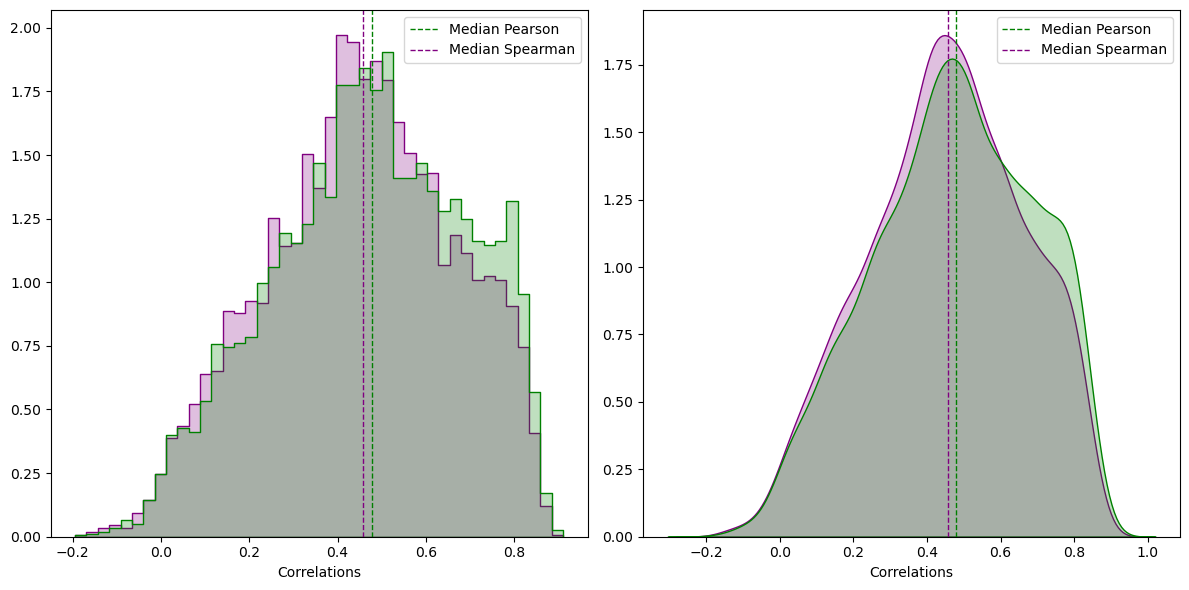

In [71]:
plot_utils.compare_datasets(pearson_corr_ccle, spearman_corr_ccle, name1 = 'Pearson', name2 = 'Spearman')


In [72]:
import matplotlib.pyplot as plt 

Proteins in both top 20:
{'MAP1B', 'BASP1', 'HSPA2', 'MCAM', 'PTK7', 'RBM47'}


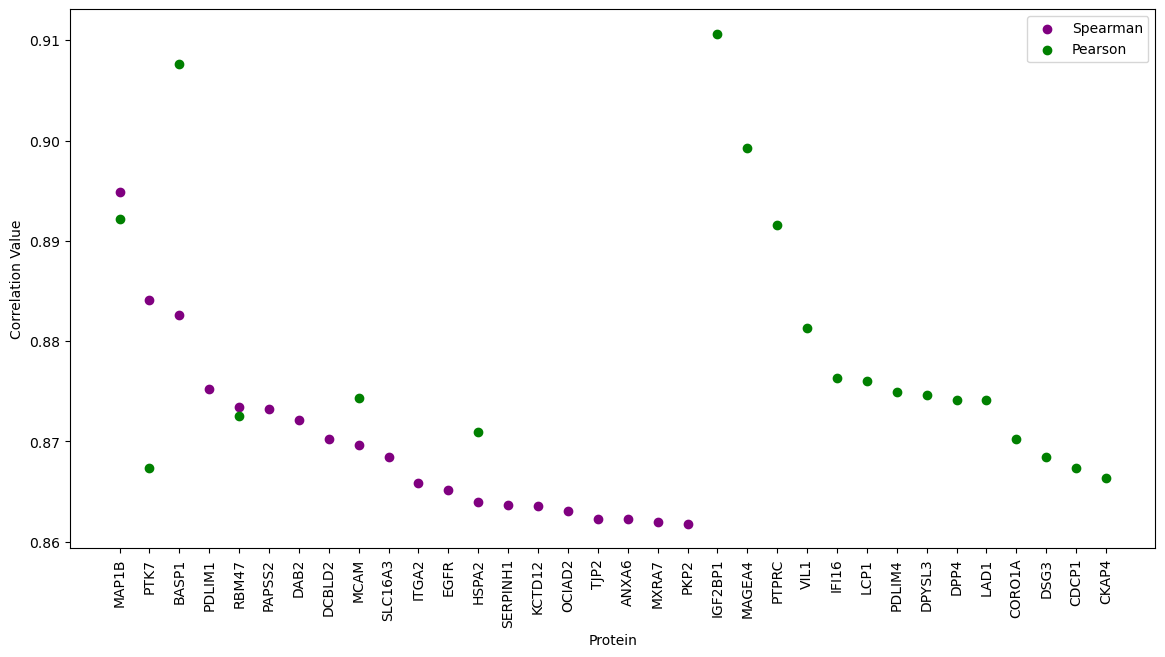

In [73]:
top_20_spearman = spearman_corr_ccle.nlargest(20, 'Spearman')
top_20_pearson = pearson_corr_ccle.nlargest(20, 'Pearson')
top_20_spearman = top_20_spearman.reset_index().rename(columns={'index': 'protein'})
top_20_pearson = top_20_pearson.reset_index().rename(columns={'index': 'protein'})

# Find common proteins in both top 20 lists
common_proteins = set(top_20_spearman['protein']).intersection(set(top_20_pearson['protein']))
print("Proteins in both top 20:")
print(common_proteins)

# Combine both top 20 lists into a single DataFrame for plotting
combined_df = pd.concat([
    top_20_spearman.assign(correlation_type='Spearman'),
    top_20_pearson.assign(correlation_type='Pearson')
])

plt.figure(figsize=(14, 7))
plt.scatter(top_20_spearman['protein'], top_20_spearman['Spearman'], color='purple', label='Spearman')
plt.scatter(top_20_pearson['protein'], top_20_pearson['Pearson'], color='green', label='Pearson')

plt.xlabel('Protein')
plt.ylabel('Correlation Value')
plt.title('')
plt.xticks(rotation=90)
plt.legend()
plt.grid(False)
plt.show()

#### Feature selection

In [74]:
from sklearn.preprocessing import MinMaxScaler


In [75]:
ccle_transcr = ccle_transcr.transpose()

In [76]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(ccle_transcr)
scaled_transcr = pd.DataFrame(scaled_data, columns=ccle_transcr.columns, index=ccle_transcr.index)

In [77]:
scaled_transcr

A2M      AAAS      AACS  \
22RV1_PROSTATE                          0.183067  0.892744  0.785826   
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.020733  0.697052  0.138989   
769P_KIDNEY                             0.019600  0.665048  0.581813   
786O_KIDNEY                             0.014966  0.519322  0.584023   
8305C_THYROID                           0.007695  0.653780  0.384818   
...                                          ...       ...       ...   
WM1799_SKIN                             0.387290  0.587703  0.589459   
WM2664_SKIN                             0.344089  0.759793  0.562758   
WM793_SKIN                              0.291759  0.348571  0.658056   
WM88_SKIN                               0.629981  0.521910  0.513102   
ZR751_BREAST                            0.020733  0.408535  0.628731   

                                           AAGAB      AAK1     AAMDC  \
22RV1_PROSTATE                          0.638549  0.765670  0.115960   
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.365550  0.654274  0.430055   
769P_KIDNEY                             0.548791  0.626055  0.430973   
786O_KIDNEY                             0.656810  0.659194  0.408015   
8305C_THYROID                           0.680045  0.667606  0.602743   
...                                          ...       ...       ...   
WM1799_SKIN                             0.668021  0.719482  0.450615   
WM2664_SKIN                             0.639491  0.696146  0.444844   
WM793_SKIN                              0.529330  0.750245  0.480026   
WM88_SKIN                               0.654276  0.557628  0.240062   
ZR751_BREAST                            0.769543  0.492292  0.482694   

                                            AAMP      AAR2     AARS2  \
22RV1_PROSTATE                          0.498725  0.646383  0.547893   
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.414996  0.603799  0.515107   
769P_KIDNEY                             0.514243  0.568643  0.497623   
786O_KIDNEY                             0.437672  0.738934  0.354981   
8305C_THYROID                           0.552768  0.730117  0.563572   
...                                          ...       ...       ...   
WM1799_SKIN                             0.384854  0.763715  0.699534   
WM2664_SKIN                             0.384118  0.710453  0.737382   
WM793_SKIN                              0.523365  0.873288  0.535925   
WM88_SKIN                               0.793682  0.914221  0.802281   
ZR751_BREAST                            0.484401  0.529966  0.257400   

                                          AARSD1  ...     ZNRF2    ZRANB2  \
22RV1_PROSTATE                          0.637323  ...  0.325768  0.621981   
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.762634  ...  0.410554  0.720416   
769P_KIDNEY                             0.691564  ...  0.288022  0.556015   
786O_KIDNEY                             0.406635  ...  0.500852  0.740109   
8305C_THYROID                           0.607963  ...  0.236481  0.465943   
...                                          ...  ...       ...       ...   
WM1799_SKIN                             0.798708  ...  0.366011  0.578400   
WM2664_SKIN                             0.598846  ...  0.568600  0.643482   
WM793_SKIN                              0.677476  ...  0.523103  0.575847   
WM88_SKIN                               0.522683  ...  0.436792  0.520212   
ZR751_BREAST                            0.600313  ...  0.813825  0.529046   

                                           ZRSR2      ZW10    ZWILCH  \
22RV1_PROSTATE                          0.274149  0.687000  0.887346   
697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  0.375731  0.537187  0.573405   
769P_KIDNEY                             0.465234  0.333870  0.715185   
786O_KIDNEY                             0.265597  0.606743  0.911419   
8305C_THYROID                           0.550556  0.641984  0.607615   
...                                          ...       ...       ...   
WM1799_SKIN          

In [78]:
ccle_prot = ccle_prot.transpose()

In [79]:
scaled_data = scaler.fit_transform(ccle_prot)
scaled_prot = pd.DataFrame(scaled_data, columns=ccle_prot.columns, index=ccle_prot.index)
ccle_prot = ccle_prot.dropna(axis='columns', how = 'any')
scaled_prot = scaled_prot.dropna(axis='columns', how='any')

In [80]:
ccle_prot.shape

(369, 4843)

In [81]:
scaled_prot.shape

(369, 4843)

In [82]:
indexes = scaled_prot.index
protein_list = scaled_prot.columns 

In [83]:
protein_list

Index(['A2M', 'AAAS', 'AACS', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2',
       'AARS2', 'AARSD1',
       ...
       'ZNF787', 'ZNF800', 'ZNF830', 'ZNHIT6', 'ZNRD1', 'ZRANB2', 'ZW10',
       'ZWILCH', 'ZYX', 'ZZZ3'],
      dtype='object', length=4843)

In [84]:
num_features_95 = linear_model.pca_95(scaled_transcr)

Number of components explaining 95% variance: 252


In [85]:
num_features_90 = linear_model.pca_90(scaled_transcr)

Number of components explaining 90% variance: 185


In [86]:
correlations = correlations.loc[protein_list]

In [46]:
correlations

Pearson  Spearman
A2M     0.373828  0.230195
AAAS    0.033262  0.054040
AACS    0.475468  0.446383
AAGAB   0.345481  0.402540
AAK1    0.623951  0.585448
...          ...       ...
ZRANB2  0.364464  0.347256
ZW10    0.331879  0.333801
ZWILCH  0.220268  0.213434
ZYX     0.685739  0.657462
ZZZ3    0.359618  0.353219

[4843 rows x 2 columns]

leave one sample out -> cross val -> model with L1 and L2 -> run regression on the dateset without the sample removed, use the model to predict the left out

### ElasticNET

#### 20 features - 4843 Proteins - SCALED

In [45]:
results_ElasticNet_20 = pd.DataFrame(columns=["protein", "cv_mse_r2", "samples_pred", "test_pred", "test_actual", "test_loss", "coefficients"])
coefficients_dict = {}

for protein in protein_list:
    result_df = linear_model.pipeline_model(model='ElasticNet', num_features=20,
                               transcriptomics=scaled_transcr, proteomics=scaled_prot,
                               protein=protein, indexes=indexes, tolerance=0.01, k=10)
    results_ElasticNet_20 = pd.concat([results_ElasticNet_20, result_df], ignore_index=True)
    if 'coefficients' in result_df:
        coefficients_dict[protein] = result_df['coefficients']


Selected Features: Index(['A2M', 'ARHGAP27', 'ARSB', 'CALD1', 'CALU', 'CKAP4', 'CNPY4', 'COL5A2',
       'CSRP2', 'FBN1', 'KANK2', 'LRP1', 'MAGED2', 'NBEAL2', 'PTPN6', 'SDC2',
       'SPARC', 'STXBP2', 'SYK', 'VKORC1'],
      dtype='object')
Best alpha: 0.002154434690031882
Best l1 ratio: 0.1
Protein: A2M_prot, Error: 0.05567006087775528, Prediction: 0.3461767859667655, Actual: 0.2905067250890102
Selected Features: Index(['AGTRAP', 'ANKRD44', 'CYFIP2', 'DBNL', 'ERGIC1', 'GLMN', 'GUK1', 'HK3',
       'IGF2BP2', 'MSI2', 'MZB1', 'PYGL', 'RAB30', 'REPIN1', 'SHOC2',
       'SLC25A46', 'SNX14', 'TCL1A', 'TRIM26', 'TXNDC12'],
      dtype='object')
Best alpha: 0.000774263682681127
Best l1 ratio: 0.1
Protein: AAAS_prot, Error: 0.17862168344516316, Prediction: 0.5121693945764598, Actual: 0.33354771113129666
Selected Features: Index(['AACS', 'AMACR', 'AP1S1', 'AVL9', 'AZGP1', 'BPNT1', 'COX18', 'DBI',
       'FIS1', 'GCC2', 'GJA1', 'GUK1', 'LACTB2', 'MCCC2', 'MRPS33', 'MYCBP',
       'REPIN1', 'SC

In [95]:
len(coefficients_dict)

115

In [47]:
sorted_results = results_ElasticNet_20.sort_values(by='test_loss', ascending=True)
sorted_results['protein'] = sorted_results['protein'].str.replace('_prot', '')  # Remove '_prot' suffix
sorted_results.set_index('protein', inplace=True)
sorted_results1perc = sorted_results[sorted_results['test_loss'] < 0.01 * abs(sorted_results['test_actual'])]
print(sorted_results1perc.shape)

(118, 6)


In [50]:
sorted_results1perc

cv_mse_r2  \
protein                                                       
LNPEP     {'mse': [0.009167364645130904, 0.0044272901335...   
CA2       {'mse': [0.005804563900178181, 0.0084823813536...   
ACP6      {'mse': [0.0055516486356657025, 0.010276564180...   
CALCOCO2  {'mse': [0.012474259740218471, 0.0161159101780...   
GCC2      {'mse': [0.006158188717921717, 0.0106795628866...   
...                                                     ...   
MYO1D     {'mse': [0.010049052687564964, 0.0178087668033...   
F11R      {'mse': [0.01070576949284851, 0.01241089485583...   
ARL2      {'mse': [0.012567617163671423, 0.0127162954980...   
EMC10     {'mse': [0.0025882581849117417, 0.017364929498...   
SGSH      {'mse': [0.00716633997001151, 0.00885652014946...   

                                               samples_pred  test_pred  \
protein                                                                  
LNPEP     {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.4...   0.453639   
CA2       {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.3...   0.411903   
ACP6      {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.4...   0.592587   
CALCOCO2  {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.4...   0.463615   
GCC2      {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.3...   0.616805   
...                                                     ...        ...   
MYO1D     {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.1...   0.612331   
F11R      {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.2...   0.624163   
ARL2      {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.5...   0.683192   
EMC10     {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.6...   0.738373   
SGSH      {'697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE': 0.4...   0.728773   

          test_actual  test_loss  \
protein                            
LNPEP        0.453566   0.000072   
CA2          0.411989   0.000086   
ACP6         0.592466   0.000121   
CALCOCO2     0.463782   0.000167   
GCC2         0.616976   0.000170   
...               ...        ...   
MYO1D        0.606558   0.005773   
F11R         0.630254   0.006091   
ARL2         0.677084   0.006108   
EMC10        0.732174   0.006200   
SGSH         0.735075   0.006303   

                                               coefficients  
protein                                                      
LNPEP     {'AHNAK2': -0.03141918183748613, 'ANAPC5': -0....  
CA2       {'ACSM3': -0.0, 'ANTXR1': 0.0, 'ARHGAP27': -0....  
ACP6      {'ACP6': 0.5189253131443787, 'APBB1IP': -0.054...  
CALCOCO2  {'ANKRD40': 0.0, 'CALCOCO2': 0.327633830556511...  
GCC2      {'BCAR1': -0.10585749063494332, 'BTK': -0.0291...  
...                                                     ...  
MYO1D     {'CDH1': 0.0, 'EPCAM': 0.0, 'ERBB3': 0.0699162...  
F11R      {'C6orf132': 0.0, 'CDH1': 0.05780785759509501,...  
ARL2      {'ARL2': 0.2595567402171341, 'BSPRY': -0.0, 'C...  
EMC10     {'ABCB10': -0.05418748002388695, 'ACSM3': -0.0...  
SGSH      {'BTK': -0.0, 'CAP2': 0.020894039384667572, 'C...  

[118 rows x 6 columns]

In [48]:
correlations = correlations.loc[sorted_results1perc.index]
correlations

Pearson  Spearman
protein                     
LNPEP     0.516425  0.504278
CA2       0.857667  0.831006
ACP6      0.744182  0.711398
CALCOCO2  0.426953  0.383783
GCC2      0.416565  0.423107
...            ...       ...
MYO1D     0.846159  0.848457
F11R      0.798073  0.809303
ARL2      0.524757  0.532752
EMC10     0.530005  0.314394
SGSH      0.670237  0.607358

[118 rows x 2 columns]

In [49]:
res_ElasticNet20 = pd.merge(correlations, sorted_results1perc, on = 'protein').sort_values(by = 'test_loss', ascending = True)
res_ElasticNet20.to_csv('res_ElasticNet20_1%.csv', index = True)

### Multilinear

#### 20 features - 4843 Proteins - 

In [79]:
results_Multilinear_20 = pd.DataFrame(columns=["protein", "prediction", "actual", "loss"])
coefficients_dict = {}

In [80]:
for protein in protein_list:
    result_df = linear_model.pipeline_model(model = 'Multilinear', num_features=20,
                                             transcriptomics = scaled_transcr, proteomics= scaled_prot, 
                                             protein=protein, indexes=indexes, tolerance = 0.05, k = 10)
    results_Multilinear_20 = pd.concat([results_Multilinear_20, result_df], ignore_index=True)
    if 'coefficients' in result_df:
        coefficients_dict[protein] = result_df['coefficients']

Selected Features: Index(['A2M', 'ARHGAP27', 'ARSB', 'CALD1', 'CALU', 'CKAP4', 'CNPY4', 'COL5A2',
       'CSRP2', 'FBN1', 'KANK2', 'LRP1', 'MAGED2', 'NBEAL2', 'PTPN6', 'SDC2',
       'SPARC', 'STXBP2', 'SYK', 'VKORC1'],
      dtype='object')
Protein: A2M_prot, CV Average MSE: 0.015210070321212608, Error: 0.06002999975125767, prediction: 0.3505367248402679, actual: 0.2905067250890102
Selected Features: Index(['AGTRAP', 'ANKRD44', 'CYFIP2', 'DBNL', 'ERGIC1', 'GLMN', 'GUK1', 'HK3',
       'IGF2BP2', 'MSI2', 'MZB1', 'PYGL', 'RAB30', 'REPIN1', 'SHOC2',
       'SLC25A46', 'SNX14', 'TCL1A', 'TRIM26', 'TXNDC12'],
      dtype='object')
Protein: AAAS_prot, CV Average MSE: 0.012034641180065683, Error: 0.1663092389443167, prediction: 0.49985695007561337, actual: 0.33354771113129666
Selected Features: Index(['AACS', 'AMACR', 'AP1S1', 'AVL9', 'AZGP1', 'BPNT1', 'COX18', 'DBI',
       'FIS1', 'GCC2', 'GJA1', 'GUK1', 'LACTB2', 'MCCC2', 'MRPS33', 'MYCBP',
       'REPIN1', 'SCP2', 'STUB1', 'WWP2'],
     

In [81]:
len(coefficients_dict)

570

In [82]:
sorted_results = results_Multilinear_20.sort_values(by = 'loss', ascending = True)
sorted_results['protein'] = sorted_results['protein'].str.replace('_prot', '')  # Remove '_prot' suffix
sorted_results.set_index('protein', inplace=True)
sorted_results1perc = sorted_results[sorted_results['loss'] < 0.05*abs(sorted_results['actual'])]
sorted_results1perc.shape

(570, 5)

In [85]:
correlations = correlations.loc[sorted_results1perc.index]
correlations

Pearson  Spearman
protein                    
SEPHS2   0.609171  0.619644
LIMCH1   0.838623  0.846496
TRIM33   0.633093  0.565437
CORO1B   0.751183  0.679561
PFKFB2   0.686955  0.661764
...           ...       ...
SGSH     0.670237  0.607358
ARID2    0.512580  0.502071
TMED4    0.513976  0.504594
CKMT1A   0.838004  0.839434
AKAP9    0.503204  0.507895

[570 rows x 2 columns]

In [86]:
res_Mult20 = pd.merge(correlations, sorted_results1perc, on = 'protein').sort_values(by = 'loss', ascending = True)
res_Mult20.to_csv('res_Mult20_5%.csv', index = True)

### Lasso Regression

20 features - 4843 Proteins - SCALED   

In [43]:
results_Lasso_20 = pd.DataFrame(columns=["protein", "prediction", "actual", "loss"])
coefficients_dict = {}

In [44]:
for protein in protein_list:
    result_df = linear_model.pipeline_model(model = 'LassoRegression', num_features=20,
                                             transcriptomics = scaled_transcr, proteomics= scaled_prot, 
                                             protein=protein, indexes=indexes, tolerance = 0.05, k = 10)
    results_Lasso_20 = pd.concat([results_Lasso_20, result_df], ignore_index=True)
    if 'coefficients' in result_df:
        coefficients_dict[protein] = result_df['coefficients']

Selected Features: Index(['A2M', 'ARHGAP27', 'ARSB', 'CALD1', 'CALU', 'CKAP4', 'CNPY4', 'COL5A2',
       'CSRP2', 'FBN1', 'KANK2', 'LRP1', 'MAGED2', 'NBEAL2', 'PTPN6', 'SDC2',
       'SPARC', 'STXBP2', 'SYK', 'VKORC1'],
      dtype='object')
Protein: A2M_prot, error: 0.05908162835045927, prediction: 0.3495883534394695, actual: 0.2905067250890102
Selected Features: Index(['AGTRAP', 'ANKRD44', 'CYFIP2', 'DBNL', 'ERGIC1', 'GLMN', 'GUK1', 'HK3',
       'IGF2BP2', 'MSI2', 'MZB1', 'PYGL', 'RAB30', 'REPIN1', 'SHOC2',
       'SLC25A46', 'SNX14', 'TCL1A', 'TRIM26', 'TXNDC12'],
      dtype='object')
Protein: AAAS_prot, error: 0.16549011481158116, prediction: 0.4990378259428778, actual: 0.33354771113129666
Selected Features: Index(['AACS', 'AMACR', 'AP1S1', 'AVL9', 'AZGP1', 'BPNT1', 'COX18', 'DBI',
       'FIS1', 'GCC2', 'GJA1', 'GUK1', 'LACTB2', 'MCCC2', 'MRPS33', 'MYCBP',
       'REPIN1', 'SCP2', 'STUB1', 'WWP2'],
      dtype='object')
Protein: AACS_prot, error: 0.25522529095199253, prediction:

In [45]:
len(coefficients_dict)

582

In [46]:
sorted_results = results_Lasso_20.sort_values(by = 'loss', ascending = True)
sorted_results['protein'] = sorted_results['protein'].str.replace('_prot', '')  # Remove '_prot' suffix
sorted_results.set_index('protein', inplace=True)
sorted_results1perc = sorted_results[sorted_results['loss'] < 0.05*abs(sorted_results['actual'])]
sorted_results1perc.shape

(582, 4)

In [47]:
correlations = correlations.loc[sorted_results1perc.index]
correlations

Pearson  Spearman
protein                    
LGMN     0.741893  0.630362
CDC73    0.237453  0.226887
ABHD12   0.713461  0.724825
FEN1     0.511849  0.542721
PLOD3    0.672868  0.630005
...           ...       ...
POLR2I   0.176063  0.165474
ARID2    0.512580  0.502071
FKBP5    0.815180  0.796692
PRKAR2A  0.581930  0.566534
PTGR2    0.545740  0.553538

[582 rows x 2 columns]

In [48]:
res_Lasso20 = pd.merge(correlations, sorted_results1perc, on = 'protein').sort_values(by = 'loss', ascending = True)
res_Lasso20.to_csv('res_Lasso20_5%.csv', index = True)

### Ridge Regression

In [79]:
results_Ridge_20 = pd.DataFrame(columns=["protein", "prediction", "actual", "loss"])
coefficients_dict = {}

In [80]:
for protein in protein_list:
    result_df = linear_model.pipeline_model(model = 'RidgeRegression', num_features=20,
                                             transcriptomics = scaled_transcr, proteomics= scaled_prot, 
                                             protein=protein, indexes=indexes, tolerance = 0.01, k = 10)
    results_Ridge_20 = pd.concat([results_Ridge_20, result_df], ignore_index=True)
    if 'coefficients' in result_df:
        coefficients_dict[protein] = result_df['coefficients']

Selected Features: Index(['A2M', 'ARHGAP27', 'ARSB', 'CALD1', 'CALU', 'CKAP4', 'CNPY4', 'COL5A2',
       'CSRP2', 'FBN1', 'KANK2', 'LRP1', 'MAGED2', 'NBEAL2', 'PTPN6', 'SDC2',
       'SPARC', 'STXBP2', 'SYK', 'VKORC1'],
      dtype='object')
Protein: A2M_prot, Error: 0.05515033235853911, Prediction: 0.3456570574475493, Actual: 0.2905067250890102
Selected Features: Index(['AGTRAP', 'ANKRD44', 'CYFIP2', 'DBNL', 'ERGIC1', 'GLMN', 'GUK1', 'HK3',
       'IGF2BP2', 'MSI2', 'MZB1', 'PYGL', 'RAB30', 'REPIN1', 'SHOC2',
       'SLC25A46', 'SNX14', 'TCL1A', 'TRIM26', 'TXNDC12'],
      dtype='object')
Protein: AAAS_prot, Error: 0.1583851892317042, Prediction: 0.49193290036300086, Actual: 0.33354771113129666
Selected Features: Index(['AACS', 'AMACR', 'AP1S1', 'AVL9', 'AZGP1', 'BPNT1', 'COX18', 'DBI',
       'FIS1', 'GCC2', 'GJA1', 'GUK1', 'LACTB2', 'MCCC2', 'MRPS33', 'MYCBP',
       'REPIN1', 'SCP2', 'STUB1', 'WWP2'],
      dtype='object')
Protein: AACS_prot, Error: 0.2637780553603296, Prediction: 

KeyboardInterrupt: 

In [ ]:
len(coefficients_dict)

127

In [ ]:
sorted_results = results_Ridge_20.sort_values(by = 'loss', ascending = True)
sorted_results['protein'] = sorted_results['protein'].str.replace('_prot', '')  # Remove '_prot' suffix
sorted_results.set_index('protein', inplace=True)
sorted_results1perc = sorted_results[abs(sorted_results['loss']) < 0.01*abs(sorted_results['actual'])]
sorted_results1perc.shape

(127, 4)

In [ ]:
correlations = correlations.loc[sorted_results1perc.index]
correlations

Pearson  Spearman
protein                    
ZNF592   0.325973  0.353789
HMGA1    0.791442  0.737623
PPP2R2B -0.048210 -0.080642
RAB11B  -0.005768 -0.017894
ANXA4    0.791215  0.734576
...           ...       ...
KCMF1    0.176608  0.137468
NFX1     0.534612  0.531009
GABPB1   0.158713  0.133345
CSNK2B   0.042310  0.046367
SMARCE1  0.212968  0.080766

[127 rows x 2 columns]

In [ ]:
res_Ridge20 = pd.merge(correlations, sorted_results1perc, on = 'protein').sort_values(by = 'loss', ascending = True)
res_Ridge20.to_csv('res_Ridge20_1%.csv', index = True)

5% RIDGE

In [81]:
results_Ridge_20_5 = pd.DataFrame(columns=["protein", "prediction", "actual", "loss"])
coefficients_dict = {}

In [82]:
for protein in protein_list:
    result_df = linear_model.pipeline_model(model = 'RidgeRegression', num_features=20,
                                             transcriptomics = scaled_transcr, proteomics= scaled_prot, 
                                             protein=protein, indexes=indexes, tolerance = 0.05, k = 10)
    results_Ridge_20 = pd.concat([results_Ridge_20, result_df], ignore_index=True)
    if 'coefficients' in result_df:
        coefficients_dict[protein] = result_df['coefficients']

Selected Features: Index(['A2M', 'ARHGAP27', 'ARSB', 'CALD1', 'CALU', 'CKAP4', 'CNPY4', 'COL5A2',
       'CSRP2', 'FBN1', 'KANK2', 'LRP1', 'MAGED2', 'NBEAL2', 'PTPN6', 'SDC2',
       'SPARC', 'STXBP2', 'SYK', 'VKORC1'],
      dtype='object')
Protein: A2M_prot, Error: 0.05515033235853911, Prediction: 0.3456570574475493, Actual: 0.2905067250890102
Selected Features: Index(['AGTRAP', 'ANKRD44', 'CYFIP2', 'DBNL', 'ERGIC1', 'GLMN', 'GUK1', 'HK3',
       'IGF2BP2', 'MSI2', 'MZB1', 'PYGL', 'RAB30', 'REPIN1', 'SHOC2',
       'SLC25A46', 'SNX14', 'TCL1A', 'TRIM26', 'TXNDC12'],
      dtype='object')
Protein: AAAS_prot, Error: 0.1583851892317042, Prediction: 0.49193290036300086, Actual: 0.33354771113129666
Selected Features: Index(['AACS', 'AMACR', 'AP1S1', 'AVL9', 'AZGP1', 'BPNT1', 'COX18', 'DBI',
       'FIS1', 'GCC2', 'GJA1', 'GUK1', 'LACTB2', 'MCCC2', 'MRPS33', 'MYCBP',
       'REPIN1', 'SCP2', 'STUB1', 'WWP2'],
      dtype='object')
Protein: AACS_prot, Error: 0.2637780553603296, Prediction: 

In [83]:
len(coefficients_dict)

559

In [84]:
sorted_results = results_Ridge_20.sort_values(by = 'loss', ascending = True)
sorted_results['protein'] = sorted_results['protein'].str.replace('_prot', '')  # Remove '_prot' suffix
sorted_results.set_index('protein', inplace=True)
sorted_results1perc = sorted_results[abs(sorted_results['loss']) < 0.05*abs(sorted_results['actual'])]
sorted_results1perc.shape

(560, 4)

In [85]:
correlations = correlations.loc[sorted_results1perc.index]
correlations

Pearson  Spearman
protein                     
ZNF592    0.325973  0.353789
HMGA1     0.791442  0.737623
PPP2R2B  -0.048210 -0.080642
RAB11B   -0.005768 -0.017894
ANXA4     0.791215  0.734576
...            ...       ...
SELENBP1  0.865751  0.806310
PCBD2     0.534457  0.529542
GGA1      0.533693  0.511284
BCL9L     0.671650  0.618798
TUSC3     0.697569  0.687059

[560 rows x 2 columns]

In [86]:
res_Ridge20_5 = pd.merge(correlations, sorted_results1perc, on = 'protein').sort_values(by = 'loss', ascending = True)
res_Ridge20_5.to_csv('res_Ridge20_5%.csv', index = True)

### OPTIONAL SECTION - hyperparameter tuning


In [47]:
from sklearn.model_selection import train_test_split

In [50]:
# Initialize a list or dictionary to store results
results_list = []
for protein in protein_list[:]:
    table = linear_model.multilinear_table(transcriptomics=scaled_transcr, proteomics=scaled_prot, protein_name=protein)
    table.index = indexes
    table = linear_model.feature_selection(table=table, num_features=20, protein=protein + '_prot')
    X = table.iloc[:, 1:]
    y = table.iloc[:, 0]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    alpha_range = np.logspace(-4, -0.5, 10)
    l1_ratio_range = np.linspace(0.01, 1.0, 10)
    model = linear_model.TunedElasticNet(alpha_range, l1_ratio_range, cv_folds=5)

    best_params = model.tune_parameters(X_train, y_train)
    mse = model.evaluate(X_test, y_test)

    # Append each protein's results to the list
    results_list.append({
        'protein': protein,
        'alpha': best_params['alpha'],
        'l1_ratio': best_params['l1_ratio'],
        'mse': mse
    })


Selected Features: Index(['A2M', 'ARHGAP27', 'ARSB', 'CALD1', 'CALU', 'CKAP4', 'CNPY4', 'COL5A2',
       'CSRP2', 'FBN1', 'KANK2', 'LRP1', 'MAGED2', 'NBEAL2', 'PTPN6', 'SDC2',
       'SPARC', 'STXBP2', 'SYK', 'VKORC1'],
      dtype='object')
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'alpha': 0.021544346900318846, 'l1_ratio': 0.01}
Test MSE: 0.012018830182001205
Selected Features: Index(['AGTRAP', 'ANKRD44', 'CYFIP2', 'DBNL', 'ERGIC1', 'GLMN', 'GUK1', 'HK3',
       'IGF2BP2', 'MSI2', 'MZB1', 'PDPK1', 'PYGL', 'RAB30', 'REPIN1', 'SHOC2',
       'SLC25A46', 'TCL1A', 'TRIM26', 'TXNDC12'],
      dtype='object')
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'alpha': 0.008799225435691074, 'l1_ratio': 0.01}
Test MSE: 0.012038203591437115
Selected Features: Index(['AACS', 'AMACR', 'AP1S1', 'AVL9', 'AZGP1', 'BPNT1', 'DBI', 'FBP1',
       'FIS1', 'GCC2', 'GJA1', 'GUK1', 'LACTB2', 'MRPS33', 'MYCBP', 'REPIN1',
    

In [51]:
# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)
print(results_df)

      protein     alpha  l1_ratio       mse
0         A2M  0.021544      0.01  0.012019
1        AAAS  0.008799      0.01  0.012038
2        AACS  0.001468      0.56  0.019153
3       AAGAB  0.001468      0.45  0.004932
4        AAK1  0.001468      1.00  0.016135
..        ...       ...       ...       ...
495   C2orf69  0.001468      1.00  0.015219
496   C3orf38  0.003594      0.23  0.016938
497       C4A  0.008799      0.01  0.019440
498   C5orf24  0.021544      0.01  0.011140
499  C6orf132  0.001468      1.00  0.012478

[500 rows x 4 columns]
